In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Wed Oct 19 01:34:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.keras.__version__

'2.9.0'

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train_full, y_train_full) , (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train_full.shape

(60000, 28, 28)

In [9]:
img = x_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
img.shape

(28, 28)

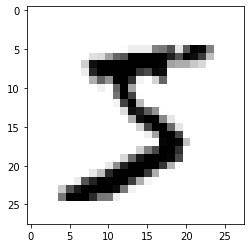

In [11]:
plt.imshow(img, cmap="binary")

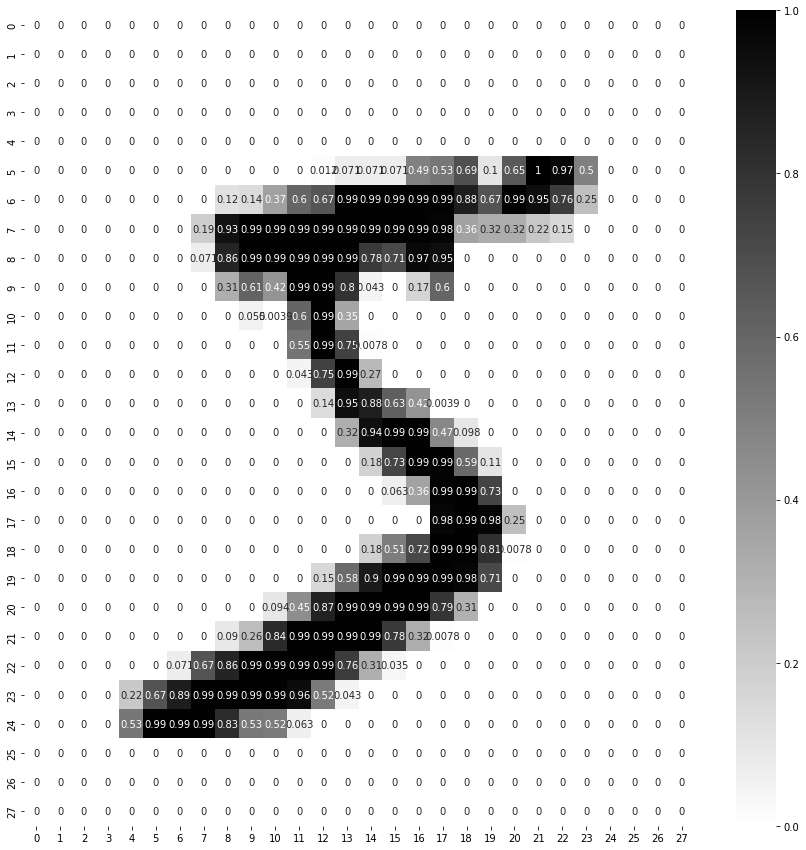

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255, annot=True, cmap="binary")

In [13]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] / 255, y_train_full[5000:] / 255

In [16]:
CLASSES = 10

LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="InputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="OutputLayer")
]

In [17]:
# Defining Model
model_clf = tf.keras.models.Sequential(LAYERS)

In [18]:
model_clf.layers

In [20]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(model_clf.layers[1].name)
weights, biases = model_clf.layers[1].get_weights()


HiddenLayer1


In [24]:
weights.shape

(784, 300)

In [25]:
biases.shape

(300,)

In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [28]:
EPOCHS = 30
VALIDATION = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, 
                        epochs=EPOCHS, 
                        batch_size = 32,
                        validation_data = VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.0141 - accuracy: 0.0989 - val_loss: 5.8478e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.1512e-04 - accuracy: 0.0990 - val_loss: 2.7355e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3177e-04 - accuracy: 0.0990 - val_loss: 1.7600e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6004e-04 - accuracy: 0.0990 - val_loss: 1.2880e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2178e-04 - accuracy: 0.0990 - val_loss: 1.0116e-04 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 9.8050e-05 - accuracy: 0.0990 - val_loss: 8.3045e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.1915e-05 - acc

In [29]:
type(history.history)

dict

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.014136,0.098891,0.000585,0.0958
1,0.000415,0.098982,0.000274,0.0958
2,0.000232,0.098982,0.000176,0.0958
3,0.000160,0.098982,0.000129,0.0958
4,0.000122,0.098982,0.000101,0.0958
5,0.000098,0.098982,0.000083,0.0958
6,0.000082,0.098982,0.000070,0.0958
7,0.000070,0.098982,0.000061,0.0958
8,0.000061,0.098982,0.000054,0.0958
9,0.000055,0.098982,0.000048,0.0958


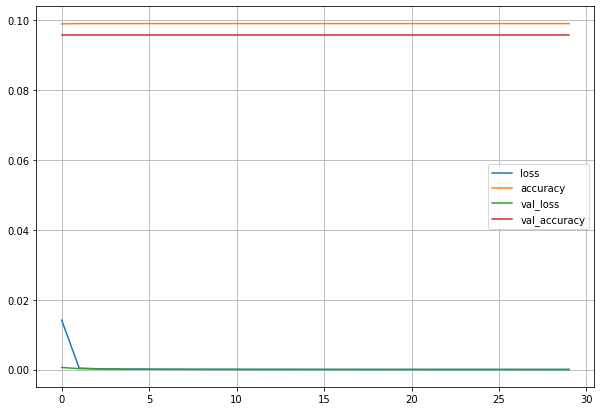

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [32]:
model_clf.evaluate(x_test, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 4413.8008 - accuracy: 0.0980


[4413.80078125, 0.09799999743700027]

In [33]:
model_clf.save("test.h5")